### 03_Pokemon_PK

from urllib.request import urlretrieve  
urlretrieve(url, filename=filepath)  
data_df = data_df.set_index(str_index)  
data_df.info()  
data_df["Type 1"].value_counts(dropna=False)    
data_df["Type 1"].fillna("empty", inplace=True)  
type1_dict = dict(enumerate(data_df["Type 1"].cat.categories))  
data_df["Type 1"] = data_df["Type 1"].cat.codes  
data_df["Type 1"] = data_df["Type 1"].cat.codes.values  
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)  
model_mckp = keras.callbacks.ModelCheckpoint()  


In [1]:
import sys,os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,utils,layers,models
from tensorflow.keras import optimizers,losses,metrics
from tensorflow.keras import callbacks
from IPython.display import Image
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

print(sys.version)
print(tf.__version__)

import requests
import re
from urllib.request import urlretrieve
import os
filenames = ["pokemon.csv","combats.csv","tests.csv"]
data_dir = "./data/"
url = "https://raw.githubusercontent.com/taipeitechmmslab/MMSLAB-TF2/master/Exercise/pokemon-challenge/"

def download_csv():
    for i in range(len(filenames)):
        dl_url = url + filenames[i]
        dl_path = data_dir + filenames[i]
        urlretrieve(dl_url, filename=dl_path)
        print("Downloaded",filenames[i])

if os.path.isfile(data_dir+filenames[0]):
    print("Files Exists")
else:
    download_csv()

3.6.12 |Anaconda, Inc.| (default, Sep  9 2020, 00:29:25) [MSC v.1916 64 bit (AMD64)]
2.0.0


In [3]:
data_df = pd.read_csv(data_dir+filenames[0])
print(data_df.shape)
data_df.head()

(800, 12)


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [4]:
data_df = data_df.set_index("#")
data_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [5]:
result_df = pd.read_csv(data_dir+filenames[1])
print(result_df.shape)
result_df.head()

(50000, 3)


,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 800
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        799 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   HP          800 non-null    int64 
 4   Attack      800 non-null    int64 
 5   Defense     800 non-null    int64 
 6   Sp. Atk     800 non-null    int64 
 7   Sp. Def     800 non-null    int64 
 8   Speed       800 non-null    int64 
 9   Generation  800 non-null    int64 
 10  Legendary   800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 69.5+ KB


In [7]:
print(data_df["Type 2"].value_counts(dropna=False))
data_df["Type 2"].fillna("empty", inplace=True)
print(data_df["Type 2"].value_counts())

NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Water        14
Ice          14
Ghost        14
Rock         14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64
empty       386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Water        14
Ice          14
Ghost        14
Rock         14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64


### 檢查資料型態

In [8]:
print(data_df.dtypes)  # 顯示對戰數據的資料型態
print('-' * 30)
print(result_df.dtypes)  # 顯示寶可夢數據的資料型態

Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object
------------------------------
First_pokemon     int64
Second_pokemon    int64
Winner            int64
dtype: object


In [9]:
data_df["Type 1"] = data_df["Type 1"].astype("category")
data_df["Type 2"] = data_df["Type 2"].astype("category")
data_df["Legendary"] = data_df["Legendary"].astype("int")
data_df.dtypes

Name            object
Type 1        category
Type 2        category
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed            int64
Generation       int64
Legendary        int32
dtype: object

In [10]:
df_type1_onehot = pd.get_dummies(data_df["Type 1"])
df_type1_onehot.head()

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
#,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [11]:
df_type2_onehot = pd.get_dummies(data_df["Type 2"])
df_type2_onehot.head()

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [12]:
combine_df_onehot = df_type1_onehot.add(df_type2_onehot, fill_value=0).astype("int64")
pd.options.display.max_columns = 30
data_df = data_df.join(combine_df_onehot)
data_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,Charmander,Fire,empty,39,52,43,60,50,65,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [13]:
type1_dict = dict(enumerate(data_df["Type 1"].cat.categories))
print(type1_dict)
print("-*-"*20)
type2_dict = dict(enumerate(data_df["Type 2"].cat.categories))
print(type2_dict)

{0: 'Bug', 1: 'Dark', 2: 'Dragon', 3: 'Electric', 4: 'Fairy', 5: 'Fighting', 6: 'Fire', 7: 'Flying', 8: 'Ghost', 9: 'Grass', 10: 'Ground', 11: 'Ice', 12: 'Normal', 13: 'Poison', 14: 'Psychic', 15: 'Rock', 16: 'Steel', 17: 'Water'}
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
{0: 'Bug', 1: 'Dark', 2: 'Dragon', 3: 'Electric', 4: 'Fairy', 5: 'Fighting', 6: 'Fire', 7: 'Flying', 8: 'Ghost', 9: 'Grass', 10: 'Ground', 11: 'Ice', 12: 'Normal', 13: 'Poison', 14: 'Psychic', 15: 'Rock', 16: 'Steel', 17: 'Water', 18: 'empty'}


In [14]:
decode_type1 = data_df["Type 1"].cat.codes.values
for i in range(10):
    print(data_df["Name"].values[i],data_df["Type 1"].values[i],decode_type1[i])

Bulbasaur Grass 9
Ivysaur Grass 9
Venusaur Grass 9
Mega Venusaur Grass 9
Charmander Fire 6
Charmeleon Fire 6
Charizard Fire 6
Mega Charizard X Fire 6
Mega Charizard Y Fire 6
Squirtle Water 17


In [15]:
data_df["Type 1"] = data_df["Type 1"].cat.codes
data_df["Type 2"] = data_df["Type 2"].cat.codes
data_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,9,13,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,Ivysaur,9,13,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,Venusaur,9,13,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,Mega Venusaur,9,13,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,Charmander,6,18,39,52,43,60,50,65,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [20]:
data_df.drop('Name', axis='columns', inplace=True)
result_df["Winner"] = result_df.apply(lambda x:0 if x.Winner == x.First_pokemon else 1,
                                      axis="columns")
result_df.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,1
1,702,701,1
2,191,668,1
3,237,683,1
4,151,231,0


### 分割數據集

In [21]:
scale = 10
result_num = result_df.shape[0] // scale
indexes = np.random.permutation(result_num)

train_num = int(result_num*0.6)
test_num = int(result_num*0.8)
train_indexes = indexes[:train_num]
val_indexes = indexes[train_num:test_num]
test_indexes = indexes[test_num:]
train_data = result_df.loc[train_indexes]
val_data = result_df.loc[val_indexes]
test_data = result_df.loc[test_indexes]

###  Normalization 標準化

In [26]:
print("len(type2_dict.values())",len(type2_dict.values()))
dict_num = len(type2_dict.values())
data_df["Type 1"] = data_df["Type 1"] / dict_num
data_df["Type 2"] = data_df["Type 2"] / dict_num

mean = data_df.loc[:,"HP":"Generation"].mean()
std = data_df.loc[:,"HP":"Generation"].std()
data_df.loc[:,"HP":"Generation"] = (data_df.loc[:,"HP":"Generation"] - mean) / std
data_df.head()

len(type2_dict.values()) 19


,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.473684,0.684211,-0.950032,-0.924328,-0.796655,-0.238981,-0.248033,-0.801002,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0.473684,0.684211,-0.362595,-0.523803,-0.347700,0.219422,0.290974,-0.284837,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0.473684,0.684211,0.420654,0.092390,0.293665,0.830626,1.009651,0.403383,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0.473684,0.684211,0.420654,0.646964,1.576395,1.502951,1.728328,0.403383,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,0.315789,0.947368,-1.185007,-0.831899,-0.989065,-0.391782,-0.787041,-0.112782,-1.398762,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


### 建立Numpy array格式的訓練數據

In [27]:
x_train_index = np.array(train_data.drop("Winner", axis="columns"))
x_val_index = np.array(val_data.drop("Winner", axis="columns"))
x_test_index = np.array(test_data.drop("Winner", axis="columns"))
print(x_train_index)

[[138 468]
 [512 586]
 [ 36  95]
 ...
 [ 50 315]
 [216 625]
 [147 700]]


In [28]:
y_train = np.array(train_data["Winner"])
y_val = np.array(val_data["Winner"])
y_test = np.array(test_data["Winner"])

### 準備兩種輸入數據：
第一種：寶可夢的屬性為數值表示。  
第二種：寶可夢的屬性為One-hot encoding表示

In [37]:
data_df_status = np.array(data_df.loc[:,:"Legendary"])
print("data_df_status.shape",data_df_status.shape) # 800寶可夢 type 1~legndary data
# -1 800的index 從0開始 ; 1 row有兩隻寶可夢的 index
# reshape(-1,20) 寶可夢 type 1~legndary 有10個 columns ; 1 row 有兩隻寶可夢
x_train_status = data_df_status[x_train_index-1].reshape((-1,20))
x_val_status = data_df_status[x_val_index-1].reshape((-1,20))
x_test_status = data_df_status[x_test_index-1].reshape((-1,20))
print("x_train_status.shape","兩隻寶可夢",x_train_status.shape)

data_df_status.shape (800, 10)
x_train_status.shape 兩隻寶可夢 (3000, 20)


In [45]:
data_df_onehot = np.array(data_df.loc[:,"HP":]) # 少了 Type 1 , Type 2
print("data_df_onehot.shape[1]",data_df_onehot.shape[1])
x_train_onehot = data_df_onehot[x_train_index - 1].reshape((-1,54))
x_val_onehot = data_df_onehot[x_val_index - 1].reshape((-1,54))
x_test_onehot = data_df_onehot[x_test_index - 1].reshape((-1,54))
print("x_train_onehot.shape",x_train_onehot.shape)

data_df_onehot.shape[1] 27
x_train_onehot.shape (3000, 54)


In [67]:
def dataset_normalize(filepath_1,filepath_2, scale=1):
    status_df = pd.read_csv(filepath_1)
    combat_df = pd.read_csv(filepath_2)
    status_df = status_df.set_index("#")
    status_df["Type 2"].fillna("empty", inplace=True)
    status_df["Type 1"] = status_df["Type 1"].astype("category")
    status_df["Type 2"] = status_df["Type 2"].astype("category")
    status_df["Legendary"] = status_df["Legendary"].astype("int")
    
    type1_onehot = pd.get_dummies(status_df["Type 1"])
    type2_onehot = pd.get_dummies(status_df["Type 2"])
    combine_onehot = type1_onehot.add(type2_onehot, fill_value=0).astype("int64")
    status_df = status_df.join(combine_onehot)
    type2_dict = dict(enumerate(status_df["Type 2"].cat.categories))
    
    status_df["Type 1"] = status_df["Type 1"].cat.codes
    status_df["Type 2"] = status_df["Type 2"].cat.codes
    
    status_df.drop("Name",axis="columns", inplace=True)
    combat_df["Winner"] = combat_df.apply(lambda x:0 if x.Winner == x.First_pokemon else 1,
                                          axis="columns")
    
    combat_num = combat_df.shape[0] // scale
    indexes = np.random.permutation(combat_num)
    train_num = int(combat_num*0.6)
    test_num = int(combat_num*0.8)
    
    train_indexes = indexes[:train_num]
    val_indexes = indexes[train_num:test_num]
    test_indexes = indexes[test_num:]
    train_data = combat_df.loc[train_indexes]
    val_data = combat_df.loc[val_indexes]
    test_data = combat_df.loc[test_indexes]
    
    dict_num = len(type2_dict.values())
    status_df["Type 1"] = status_df["Type 1"] / dict_num
    status_df["Type 2"] = status_df["Type 2"] / dict_num
    mean = status_df.loc[:, "HP":"Generation"].mean()
    std = status_df.loc[:, "HP":"Generation"].std()
    status_df.loc[:, "HP":"Generation"] = (status_df.loc[:, "HP":"Generation"] - mean) / std
    
    x_train_index = np.array(train_data.drop("Winner", axis="columns"))
    x_val_index = np.array(val_data.drop("Winner", axis="columns"))
    x_test_index = np.array(test_data.drop("Winner", axis="columns"))
    y_train = np.array(train_data["Winner"])
    y_val = np.array(val_data["Winner"])
    y_test = np.array(test_data["Winner"])
        
    dummy_status_df = np.array(status_df.loc[:, :"Legendary"])
    dummy_clm_num = int(dummy_status_df.shape[1] * 2) 
    x_train_status = dummy_status_df[x_train_index - 1].reshape((-1, dummy_clm_num))
    x_val_status = dummy_status_df[x_val_index - 1].reshape((-1, dummy_clm_num))
    x_test_status = dummy_status_df[x_test_index - 1].reshape((-1, dummy_clm_num))
    
    dummy_status_onehot = np.array(status_df.loc[:, "HP":])
    dummy_onehot_num = int(dummy_status_onehot.shape[1] * 2)
    x_train_onehot = dummy_status_onehot[x_train_index - 1].reshape((-1, dummy_onehot_num))
    x_val_onehot = dummy_status_onehot[x_val_index - 1].reshape((-1, dummy_onehot_num))
    x_test_onehot = dummy_status_onehot[x_test_index - 1].reshape((-1, dummy_onehot_num))
    print("Data Normalized")
    
    return (x_train_status,y_train), (x_val_status,y_val), (x_test_status,y_test), (x_train_onehot, x_val_onehot,x_test_onehot)
    
    
filepath_1 = data_dir+filenames[0]
filepath_2 = data_dir+filenames[1]
train_data, val_data, test_data, onehot_data = dataset_normalize(filepath_1,filepath_2, scale=10)

Data Normalized


In [78]:
def build_model(input_units,model_name):
    inputs = keras.Input(shape=(input_units,))
    x = layers.Dense(units=32, activation="relu")(inputs)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(units=64, activation="relu")(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(units=32, activation="relu")(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(units=1, activation="sigmoid")(x)
    model = models.Model(inputs, outputs, name=model_name)
    return model

model_1 = build_model(20,"model-1")
model_1.summary()    

Model: "model-1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                672       
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)                0   

In [68]:
model_1.compile(keras.optimizers.Adam(lr=0.01),
               # loss=keras.losses.BinaryCrossentropy(), 
               loss=keras.losses.BinaryCrossentropy(from_logits=True), 
               metrics=[keras.metrics.BinaryAccuracy()])
(x_train_normal, y_train) = train_data
(x_val_normal, y_val) = val_data
(x_test_normal, y_test) = test_data

In [94]:
model_dir = 'models/lab3-logs'  # 設定儲存權重目錄
os.makedirs(model_dir, exist_ok=True)  # 創建儲存權重目錄
# 儲存訓練記錄檔
log_dir = os.path.join("models","lab3-logs","model-1")
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
# 儲存最好的網路模型權重
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-1.h5', 
                                             monitor='val_binary_accuracy', 
                                             save_best_only=True, 
                                             mode='max')

batch_size = 128
epochs = 6

history_1 = model_1.fit(x_train_normal, y_train, 
                batch_size=batch_size ,
                epochs=epochs, 
                validation_data=(x_val_normal, y_val),
                verbose=2,
                callbacks=[model_cbk, model_mckp])
print("Training Finished")

Train on 3000 samples, validate on 1000 samples
Epoch 1/6
3000/3000 - 0s - loss: 0.5490 - binary_accuracy: 0.8720 - val_loss: 0.5432 - val_binary_accuracy: 0.8860
Epoch 2/6
3000/3000 - 0s - loss: 0.5497 - binary_accuracy: 0.8687 - val_loss: 0.5429 - val_binary_accuracy: 0.8870
Epoch 3/6
3000/3000 - 0s - loss: 0.5503 - binary_accuracy: 0.8703 - val_loss: 0.5416 - val_binary_accuracy: 0.8910
Epoch 4/6
3000/3000 - 0s - loss: 0.5468 - binary_accuracy: 0.8783 - val_loss: 0.5422 - val_binary_accuracy: 0.8880
Epoch 5/6
3000/3000 - 0s - loss: 0.5499 - binary_accuracy: 0.8687 - val_loss: 0.5445 - val_binary_accuracy: 0.8800
Epoch 6/6
3000/3000 - 0s - loss: 0.5496 - binary_accuracy: 0.8663 - val_loss: 0.5417 - val_binary_accuracy: 0.8880
Training Finished


### 使用One-hot編碼訓練網路（Model 2）

In [80]:
model_2 = build_model(54,"model-2")
model_2.summary()

Model: "model-2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 54)]              0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                1760      
_________________________________________________________________
dropout_9 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_11 (Dropout)         (None, 32)                0   

In [95]:
(x_train_onehot, x_val_onehot, x_test_onehot) = onehot_data

# 儲存訓練記錄檔
log_dir = os.path.join("models","lab3-logs","model-2")
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
# 儲存最好的網路模型權重
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-2.h5', 
                                             monitor='val_binary_accuracy', 
                                             save_best_only=True, 
                                             mode='max')

model_2.compile(keras.optimizers.Adam(lr=0.01),
               # loss=keras.losses.BinaryCrossentropy(), 
               loss=keras.losses.BinaryCrossentropy(from_logits=True), 
               metrics=[keras.metrics.BinaryAccuracy()])
history_2 = model_2.fit(x_train_onehot, y_train, 
                batch_size=batch_size ,
                epochs=epochs, 
                validation_data=(x_val_onehot, y_val),
                verbose=2,
                callbacks=[model_cbk, model_mckp])

Train on 3000 samples, validate on 1000 samples
Epoch 1/6
3000/3000 - 1s - loss: 0.5572 - binary_accuracy: 0.8493 - val_loss: 0.5581 - val_binary_accuracy: 0.8520
Epoch 2/6
3000/3000 - 0s - loss: 0.5562 - binary_accuracy: 0.8560 - val_loss: 0.5571 - val_binary_accuracy: 0.8570
Epoch 3/6
3000/3000 - 0s - loss: 0.5548 - binary_accuracy: 0.8623 - val_loss: 0.5569 - val_binary_accuracy: 0.8620
Epoch 4/6
3000/3000 - 0s - loss: 0.5555 - binary_accuracy: 0.8637 - val_loss: 0.5541 - val_binary_accuracy: 0.8700
Epoch 5/6
3000/3000 - 0s - loss: 0.5512 - binary_accuracy: 0.8733 - val_loss: 0.5513 - val_binary_accuracy: 0.8800
Epoch 6/6
3000/3000 - 0s - loss: 0.5564 - binary_accuracy: 0.8697 - val_loss: 0.5597 - val_binary_accuracy: 0.8750


### 比較兩種網路的訓練結果

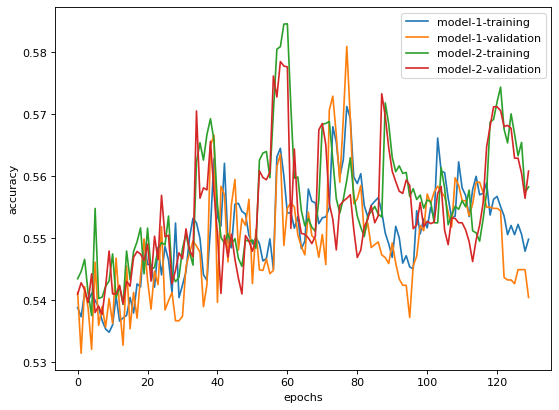

In [92]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(history_1.history['loss'], label='model-1-training')
plt.plot(history_1.history['val_loss'], label='model-1-validation')
plt.plot(history_2.history['loss'], label='model-2-training')
plt.plot(history_2.history['val_loss'], label='model-2-validation')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

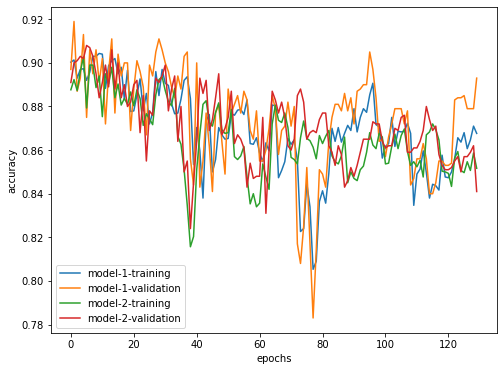

In [93]:
plt.figure(figsize=(8, 6))
plt.plot(history_1.history['binary_accuracy'], label='model-1-training')
plt.plot(history_1.history['val_binary_accuracy'], label='model-1-validation')
plt.plot(history_2.history['binary_accuracy'], label='model-2-training')
plt.plot(history_2.history['val_binary_accuracy'], label='model-2-validation')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

### 驗證在測試集上

In [97]:
# 載入Model 1準確率最高的模型權重
model_1.load_weights(model_dir + '/Best-model-1.h5')
# 載入Model 2準確率最高的模型權重
model_2.load_weights(model_dir + '/Best-model-2.h5')
loss_1, accuracy_1 = model_1.evaluate(x_test_normal, y_test, verbose=0)
loss_2, accuracy_2 = model_2.evaluate(x_test_onehot, y_test, verbose=0)
print("Model-1: {}%\nModel-2: {}%".format(accuracy_1, accuracy_2))

Model-1: 0.8930000066757202%
Model-2: 0.875%


### 寶可夢PK

In [100]:
venusaur = np.expand_dims(data_df_onehot[3], axis=0)    # 妙蛙花
charizard = np.expand_dims(data_df_onehot[7], axis=0)   # 噴火龍
blastoise = np.expand_dims(data_df_onehot[12], axis=0)  # 水箭龜

# 妙蛙花 vs 噴火龍
pred = model_2.predict(np.concatenate([venusaur, charizard], axis=-1))
winner = '妙蛙花' if pred <= 0 else '噴火龍'
print("pred={}, {} 獲勝".format(pred, winner))

# 噴火龍 vs 水箭龜
pred = model_2.predict(np.concatenate([charizard, blastoise], axis=-1))
winner = '噴火龍' if pred <= 0 else '水箭龜'
print("pred={}, {} 獲勝".format(pred, winner))

# 水箭龜 vs 妙蛙花
pred = model_2.predict(np.concatenate([blastoise, venusaur], axis=-1))
winner = '水箭龜' if pred <= 0 else '妙蛙花'
print("pred={}, {} 獲勝".format(pred, winner))

pred=[[1.]], 噴火龍 獲勝
pred=[[0.]], 噴火龍 獲勝
pred=[[1.]], 妙蛙花 獲勝
